In [1]:
import torch
import torchvision.datasets as datasets
from torchmetrics.image.fid import FrechetInceptionDistance
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import FID_util
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/FID_real_image/"

## Data Sets

In [2]:
# MNIST
MNIST_train_loader = FID_util.DataLoader(datasets.MNIST('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

MNIST_test_loader =  FID_util.DataLoader(datasets.MNIST('./data', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
MNIST_train, MNIST_test = FID_util.load_data(MNIST_train_loader, MNIST_test_loader, 10000, (28, 28))

# Base FID
print(f"Base FID MNIST: {FID_util.compute_FID(MNIST_train, MNIST_test).item()}")

Base FID MNIST: 1.5220389366149902


In [3]:
# CIFAR 100
CIFAR_train_loader = FID_util.DataLoader(datasets.CIFAR100('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

CIFAR_test_loader =  FID_util.DataLoader(datasets.CIFAR100('./data', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
CIFAR_train, CIFAR_test = FID_util.load_data(CIFAR_train_loader, CIFAR_test_loader, 10000, (32, 32))

# Base FID
print(f"Base FID CIFAR: {FID_util.compute_FID(CIFAR_train, CIFAR_test).item()}")

Files already downloaded and verified
Files already downloaded and verified
Base FID CIFAR: 5.892246723175049


In [4]:
# CelebA
CelebA_train_loader = DataLoader(datasets.CelebA('./data', split="train", download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

CelebA_test_loader =  DataLoader(datasets.CelebA('./data', split="test", download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
CelebA_train, CelebA_test = FID_util.load_data(CelebA_train_loader, CelebA_test_loader, 10000, (218, 178))

# Base FID
print(f"Base FID CelebA: {FID_util.compute_FID(CelebA_train, CelebA_test, batch_num=125).item()}")

Files already downloaded and verified
Files already downloaded and verified
Base FID CelebA: 3.541612386703491


## Image Sharpening

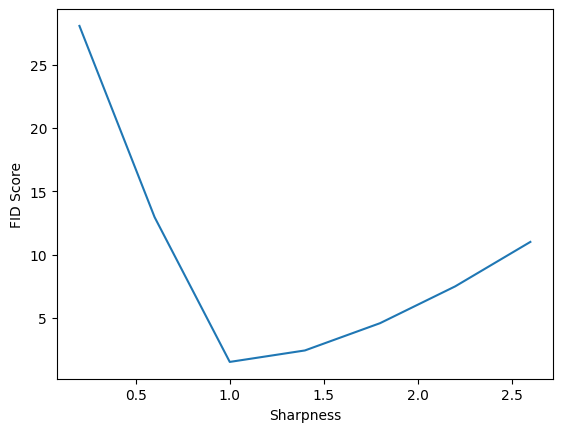

In [5]:
level_array = np.arange(0.2, 3.0, 0.4)
FID_util.plot_FID(level_array, transforms.functional.adjust_sharpness, "Sharpness", MNIST_train, MNIST_test)
plt.savefig(plot_path + "MNIST_sharpness_fid_scores")

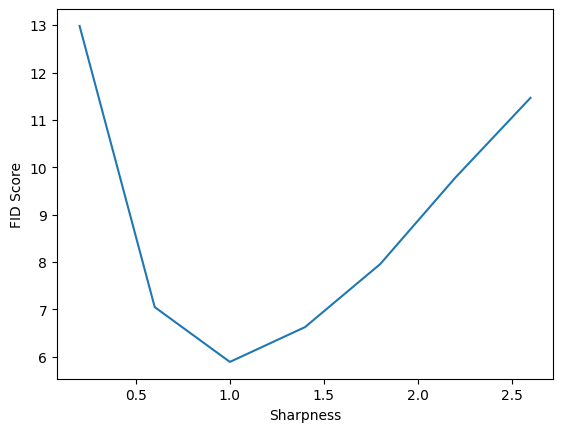

In [6]:
FID_util.plot_FID(level_array, transforms.functional.adjust_sharpness, "Sharpness", CIFAR_train, CIFAR_test)
plt.savefig(plot_path + "CIFAR_sharpness_fid_scores")

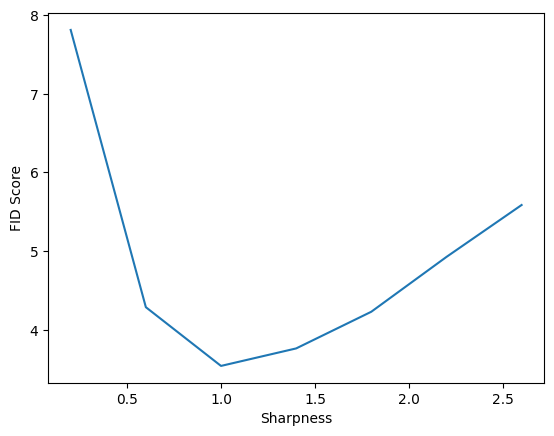

In [7]:
FID_util.plot_FID(level_array, transforms.functional.adjust_sharpness, "Sharpness", CelebA_train, CelebA_test, batch_num=125)
plt.savefig(plot_path + "CelebA_sharpness_fid_scores")

## Hue Adjust

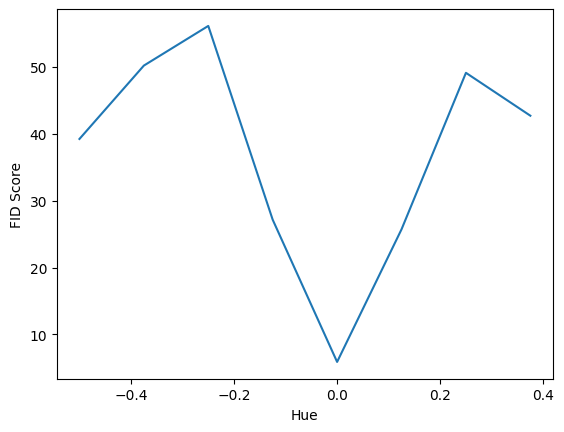

In [8]:
hue_array = np.arange(-0.5, 0.5, 0.125)
FID_util.plot_FID(hue_array, transforms.functional.adjust_hue, "Hue", CIFAR_train, CIFAR_test)
plt.savefig(plot_path + "CIFAR_hue_fid_scores")

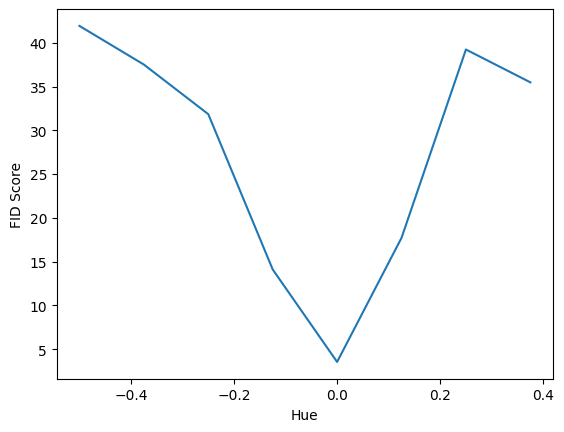

In [9]:
FID_util.plot_FID(hue_array, transforms.functional.adjust_hue, "Hue", CelebA_train, CelebA_test, batch_num=125)
plt.savefig(plot_path + "CelebA_hue_fid_scores")

## Image Rotation

In [10]:
angles = [90, 180, 270]
for angle in angles:
    print(f"------- Rotation of {angle} degrees -------")
    print(f"MNIST: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, MNIST_train, MNIST_test)}")
    print(f"CIFAR: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, CIFAR_train, CIFAR_test)}")

------- Rotation of 90 degrees -------
MNIST: 24.55718231201172
CIFAR: 26.36087989807129
------- Rotation of 180 degrees -------
MNIST: 6.615917205810547
CIFAR: 19.506975173950195
------- Rotation of 270 degrees -------
MNIST: 24.65618324279785
CIFAR: 26.26152229309082


In [11]:
# CelebA is rectangle, so only 180 degree is possible
print(f"CelebA 180 degrees: {FID_util.compute_transform_FID(transforms.functional.rotate, 180, CelebA_train, CelebA_test, batch_num=125)}")

CelebA 180 degrees: 97.68849182128906


## Switching Segments

32.61725616455078

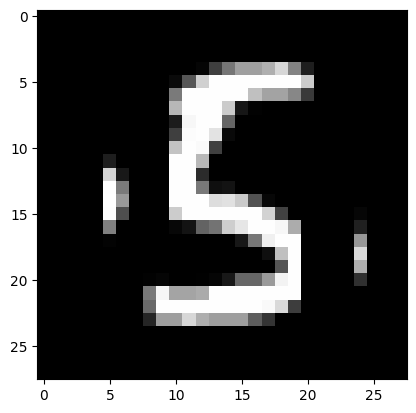

In [12]:
FID_util.swap_chunks((5, 10, 10, 20), (20, 15, 25, 25), MNIST_train, MNIST_test)

16.38009262084961

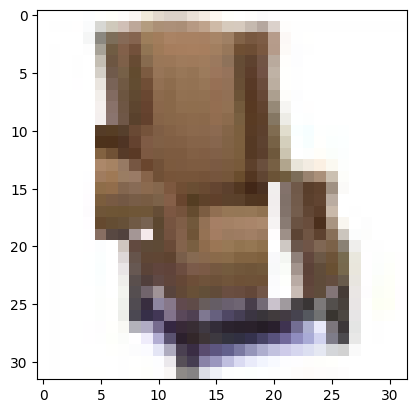

In [13]:
FID_util.swap_chunks((5, 10, 10, 20), (20, 15, 25, 25), CIFAR_train, CIFAR_test)

24.81599235534668

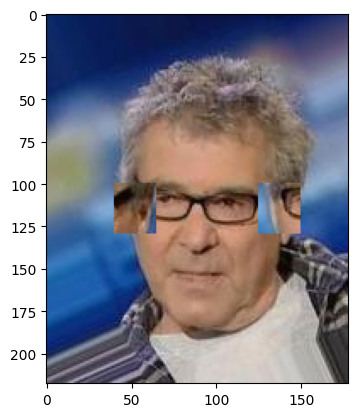

In [14]:
FID_util.swap_chunks((125, 100, 150, 130), (40, 100, 65, 130), CelebA_train, CelebA_test, batch_num=125)